# This is a very simple algorithm comparision using Titanic dataset, here, I am not concerned about algorithms parameters, just the raw

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import scikitplot as skplt

In [5]:
df = pd.read_csv("train.csv")

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#Selecting only interesting features and the label

df = df[['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]

In [8]:
df.head()

,Sex,Age,SibSp,Parch,Fare,Survived
0,male,22.0,1,0,7.2500,0
1,female,38.0,1,0,71.2833,1
2,female,26.0,0,0,7.9250,1
3,female,35.0,1,0,53.1000,1
4,male,35.0,0,0,8.0500,0


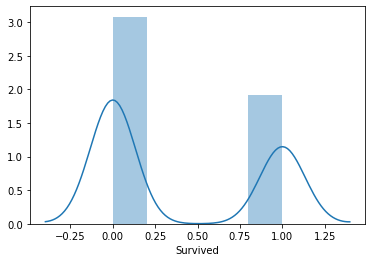

In [12]:
sns.distplot(df['Survived'])

In [16]:
#Ok, one-hot enconding the categorical variables

df = pd.concat([df, pd.get_dummies(df['Sex'], prefix='Sex')], axis=1)
del df['Sex']

In [21]:
#Droping nas
df.dropna(inplace = True)

In [22]:
df

,Age,SibSp,Parch,Fare,Survived,Sex_female,Sex_male
0,22.0,1,0,7.2500,0,0,1
1,38.0,1,0,71.2833,1,1,0
2,26.0,0,0,7.9250,1,1,0
3,35.0,1,0,53.1000,1,1,0
4,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...
885,39.0,0,5,29.1250,0,1,0
886,27.0,0,0,13.0000,0,0,1
887,19.0,0,0,30.0000,1,1,0
889,26.0,0,0,30.0000,1,0,1


In [25]:
#Diving by features, labels, test and train
X = df.drop(columns = 'Survived')
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Ok, lets test some models

# SVM

In [27]:
#Training SVM
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
#Getting predictions
y_pred_svm = svm.predict(X_test)

In [32]:
#Accuracy
accuracy_score(y_test, y_pred_svm)

0.6652542372881356

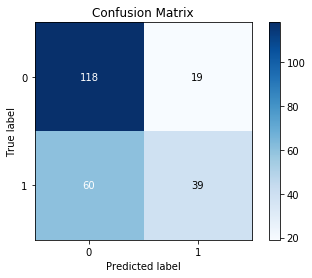

In [45]:
#Confusion matrix
skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred_svm)

# Logistic Regression

In [50]:
#Getting predictions
LR = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred_LR = LR.predict(X_test)

In [51]:
#Accuracy
accuracy_score(y_test, y_pred_LR)

0.7627118644067796

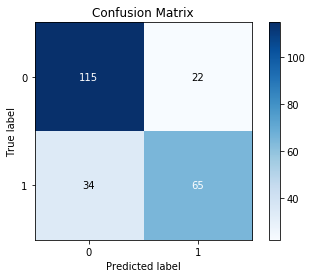

In [52]:
#Confusion matrix
skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred_LR)

# Naive Bayes

In [54]:
#Creating and training model
NB = GaussianNB()
NB.fit(X_test, y_test)

GaussianNB(priors=None, var_smoothing=1e-09)

In [56]:
#Getting the predictions
y_pred_NB = NB.predict(X_test)

In [57]:
#Accuracy
accuracy_score(y_test, y_pred_NB)

0.7754237288135594

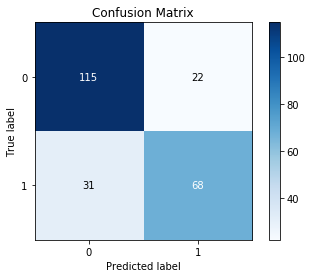

In [58]:
#Confusion matrix
skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred_NB)